<a href="https://colab.research.google.com/github/seanchatman/pixray/blob/master/Copy_of_Pixray_Swap_Model_and_Settings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pixray Settings demo

This version of the notebook is setup to easily change the rendering model that draws the image, as well as update other settings before running.

In [ ]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. You should only need to run this part once.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

#@markdown When complete you will need to do Runtime -> Restart Runtime from the menu

# Add a gpu check
nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  print(f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, some things might not work <--")
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

print("Installing...")
from IPython.utils import io
with io.capture_output() as captured:
  print("with")
  !rm -Rf pixray
  !git clone --recursive https://github.com/seanchatman/pixray
  !pip install -r pixray/requirements.txt
  !pip install basicsr diffvg
  !pip uninstall -y tensorflow 
  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  !pip freeze | grep torch

import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  print("Please choose Runtime -> Restart Runtime from the menu to continue!")
else:
  print("Setup Complete! Good luck with your drawing")


GPU check: 16280 MiB available: this should be fine
Installing...


In [ ]:
#@title Easy Settings

#@markdown Let's take a prompt and try drawing with a number
#@markdown of different models. The models we will be using are
#@markdown VQGAN models which mainly differ on the trained data
#@markdown and architecture. Swapping the model will make the result
#@markdown look differnt. For example: "wikiart" is trained on
#@markdown artwork and so draws things less photorealistic.

#@markdown Best bet: just try different models out and see what happens.

import sys
sys.path.append("pixray")

prompts = "post-impressionist bright vibrant rainbow color flower market, french town, cathedral, sunset sky" #@param {type:"string"}

vqgan_model = "wikiart_16384" #@param ["imagenet_f16_16384", "imagenet_f16_1024", "openimages_f16_8192", "wikiart_1024", "wikiart_16384", "coco"]

quality = "best" #@param ["draft", "normal", "better", "best"]

aspect = "widescreen" #@param ["widescreen", "square", "portrait"]

#@markdown When you have the settings you want, press the play button on the left.
#@markdown We will apply these settings below.

## Apply settings

The code block below shows how the settings above get applied. You can add your own before we start the code. For example, you can set the drawer to "pixel" or used a fixed random number seed. This allows us to mix and match the best settings discussed in differnt notebooks.

Make sure you click the play button below *after* running the easy settings above if you want to make any of these modifications before running.

In [ ]:
# Simple setup from menu choices
import pixray
pixray.reset_settings()
pixray.add_settings(prompts=prompts)
pixray.add_settings(drawer="vqgan", vqgan_model=vqgan_model)
pixray.add_settings(quality=quality, aspect=aspect)
pixray.add_settings(display_clear=True)

# hey, let's try that new RN50x16 CLIP model huh?
pixray.add_settings(clip_models="RN50x16")

# examples below start with '#" are comments and do not get run
# pixray.add_settings(init_image="file.png")
# pixray.add_settings(init_image_alpha=200)
# pixray.add_settings(overlay_image="file.png")
# pixray.add_settings(image_prompts="file.png")
# pixray.add_settings(overlay_every=20)
# pixray.add_settings(seed=42)
# pixray.add_settings(display_every=50)
# pixray.add_settings(iterations=200)
pixray.add_settings(size=[640, 427])
# pixray.add_settings(vector_prompts="textoff:4")

# if you enable drawers below make sure to disable the "vqgan_model" line above
# pixray.add_settings(drawer="fft")
# pixray.add_settings(drawer="pixel")
# pixray.add_settings(drawer="vdiff")

# change from CLIP guided to SLIP guided by enabling this line
# pixray.add_settings(perceptors="slip")

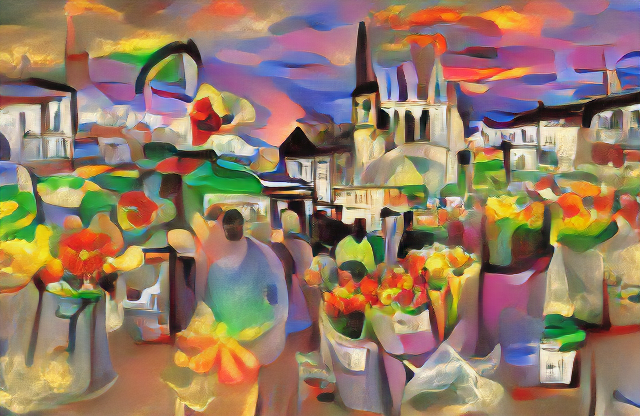

iter: 140, loss: 0.615, losses: 0.525, 0.0899 (-14=>0.6009)
iter: 150, loss: 0.65, losses: 0.561, 0.0886 (-24=>0.6009)


In [ ]:
#@title Now Run

#@markdown Now we'll apply all settings and run.
#@markdown 
#@markdown Click the play button to the left to get this running.
#@markdown 
#@markdown When this is done, you can go above and change the
#@markdown model in the settings and see if you get different results.
#@markdown Note that the first time you run any model it takes a bit
#@markdown longer because the model has to download when needed.

print(prompts)
settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)
